# Modelo de árbol de decisión:
Por: Andrea Rodriguez Ospina

**Objetivo:** Desarrollar un modelo predictivo que pueda determinar con buena precisión la supervivencia de los pasajeros del Titanic en función de diversas características demográficas y de viaje.

### Carga y análisis exploratorio de datos

Para cargar el conjunto de datos y comenzar con el análisis exploratorio, se requieren las siguientes bibliotecas:

- **Pandas** para la manipulación de datos.
- **Matplotlib** y Seaborn para la visualización de datos.
- **NumPy** para operaciones numéricas básicas.
- **Seaborn** Para gráficos

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = r'D:\Estudios\UNAD\Análisis de datos\Guias\Tarea 5 - Proyecto Análisis de datos\titanic-dataset.csv'
titanic_data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


---

Para entender mejor la relación entre las diferentes variables se crean los siguientes gráficos:

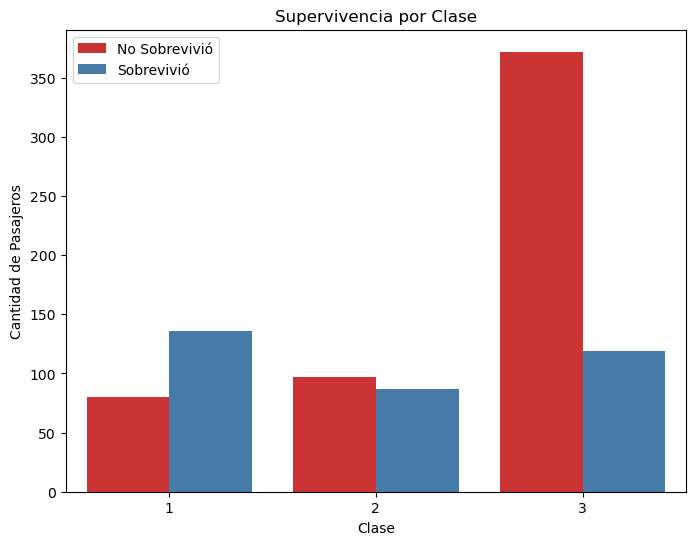

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='Set1')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Supervivencia por Clase')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()


**Análisis:** El gráfico revela una clara disparidad en las tasas de supervivencia entre las diferentes clases de pasajeros. Se observa que en la clase 1, hubo más sobrevivientes que en la clase 3 y en la clase 2. Donde la clase 3 resalta por tener la tasa de no supervivencia más elevada, lo que sugiere que la clase de pasajero sí influyó en las posibilidades de supervivencia en el desastre del Titanic. 

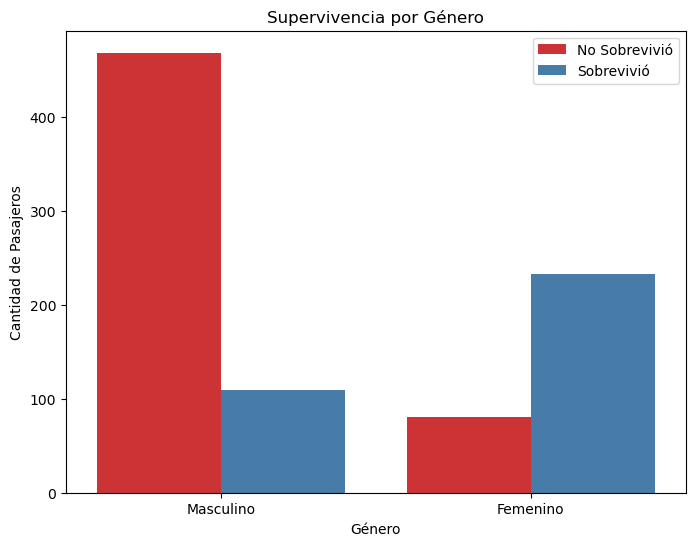

In [47]:
# Convertir los valores numéricos de la columna 'Sex' a categorías 'Femenino' y 'Masculino'
titanic_data['Sex'] = titanic_data['Sex'].replace({0: 'Masculino', 1: 'Femenino'})

# Crear el gráfico de barras para visualizar la supervivencia por género
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='Set1')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Supervivencia por Género')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()


**Análisis:** El gráfico muestra que la supervivencia durante el desastre del Titanic estuvo fuertemente influenciada por el género de los pasajeros, destacando una tasa de supervivencia significativamente mayor entre las mujeres en comparación con los hombres durante el naufragio.

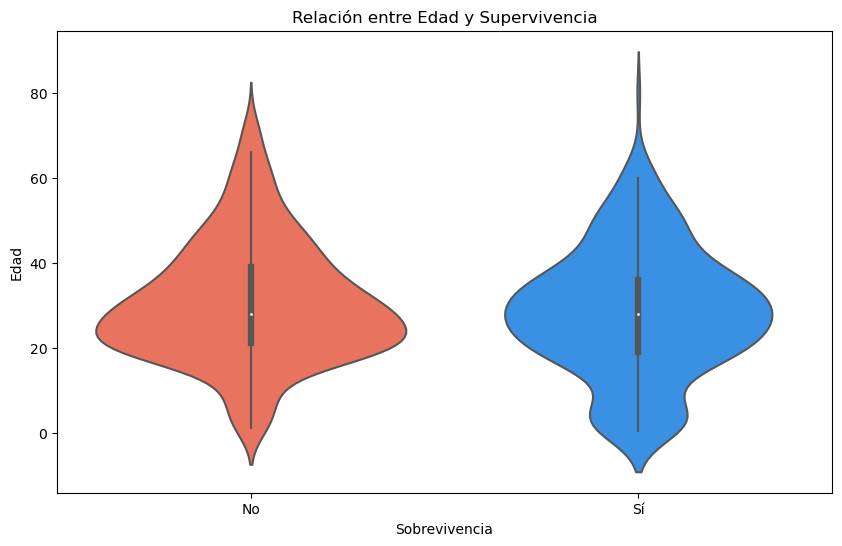

In [23]:
# Gráfico de violín para comparar la distribución de edades entre sobrevivientes y no sobrevivientes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data, palette=['#FF6347', '#1E90FF'])
plt.title('Relación entre Edad y Supervivencia')
plt.xlabel('Sobrevivencia')
plt.ylabel('Edad')

# Personalizar las etiquetas del eje x
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

plt.show()

**Análisis:** El gráfico de violín muestra cómo la edad está relacionada con la supervivencia en el desastre del Titanic, destacando una mayor concentración de pasajeros adultos entre las edades de 20 y 40 años, así como una proporción mayor de "niños" de poca edad que sobrevivieron.

## Preprocesamiento de datos 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde la ruta
file_path = r'D:\Estudios\UNAD\Análisis de datos\Guias\Tarea 5 - Proyecto Análisis de datos\titanic-dataset.csv'

# Leer el archivo CSV
titanic_data = pd.read_csv(file_path)

# Verificar valores faltantes
print("Valores faltantes antes de manejar los datos:")
print(titanic_data.isnull().sum())

# Manejar los valores faltantes
if 'Age' in titanic_data.columns:
    titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

if 'Embarked' in titanic_data.columns:
    if not titanic_data['Embarked'].mode().empty:
        titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

if 'Fare' in titanic_data.columns:
    titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Verificar que no haya valores faltantes
print("Valores faltantes después de manejar los datos:")
print(titanic_data.isnull().sum())

# Convertir variables categóricas en variables numéricas
if 'Sex' in titanic_data.columns:
    titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

if 'Survived' in titanic_data.columns:
    titanic_data['Survived'] = titanic_data['Survived'].astype(int)

# Escalar las características numéricas
scaler = StandardScaler()
if 'Age' in titanic_data.columns and 'Fare' in titanic_data.columns:
    titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Eliminar columnas innecesarias
titanic_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

# Mostrar los primeros registros para verificar el preprocesamiento
print(titanic_data.head())


Valores faltantes antes de manejar los datos:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Valores faltantes después de manejar los datos:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    0 -0.565736      1      0 -0.502445   
1            2         1       1    1  0.663861      1      0  0.786845   
2            3         1       3    1 -0.258337      0      0 -0.488854   
3            4         1       1    1  0.433312      1      0  0.420730   
4            5         0       3    0  0.433312  

**Análisis:** Antes de manejar los datos, se observan valores faltantes en las columnas "Age", "Cabin", y "Embarked". Después de realizar el manejo de datos, los valores faltantes en "Age" han sido completados. Sin embargo, la columna "Cabin" aún tiene 687 valores faltantes (pero no se le dará mayor impartancia dado que no es una característica relevante para el modelo). Las demás columnas no presentan valores faltantes. Además, se observa que las edades han sido normalizadas, y se ha asignado valores numéricos a las variables categóricas "Sex" y "Embarked". Por lo que se puede decir que el procesamiento de datos es adecuado. 

### Selección de características

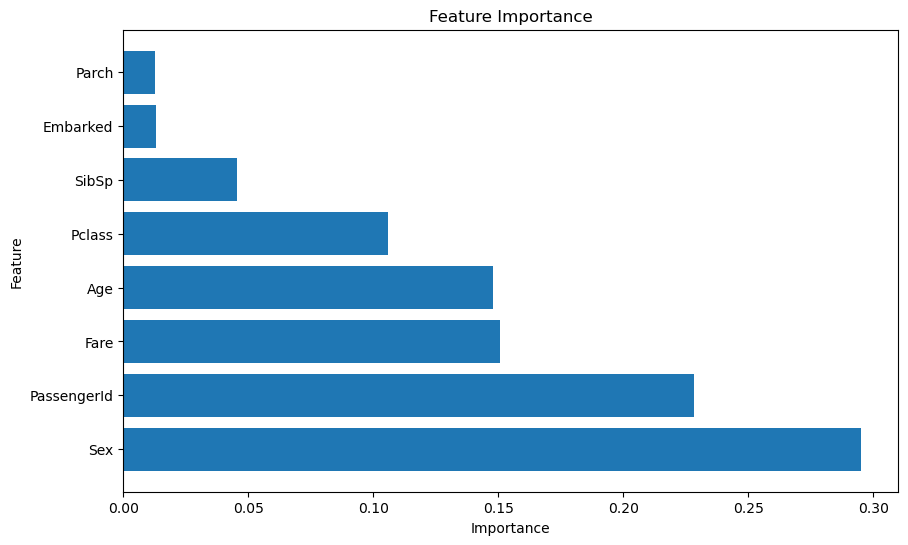

       Feature  Importance
2          Sex    0.295231
0  PassengerId    0.228473
6         Fare    0.150785
3          Age    0.148029
1       Pclass    0.105777
4        SibSp    0.045583
7     Embarked    0.013271
5        Parch    0.012851


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo para calcular la importancia de las características
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Imprimir la importancia de las características
print(feature_importance_df)

**Análisis:** El gráfico de barras muestra la importancia de las características en el modelo de árbol de decisión. Según los resultados:

**Sexo (Sex):** Es la característica más importante, con una importancia del 29.52%. Esto sugiere que el género de los pasajeros tiene una fuerte influencia en la predicción de la supervivencia.

**Identificación del Pasajero (PassengerId):** Aunque es relevante, su importancia es menor que la del género, representando el 22.85%. Esto indica que el ID del pasajero también tiene cierta influencia en la predicción, pero no tanto como el género.

**Tarifa (Fare):** Con una importancia del 15.08%, la tarifa pagada por el pasajero también es un factor significativo en la predicción de la supervivencia.

**Edad (Age):** Aunque importante, su influencia es menor en comparación con las características anteriores, con una importancia del 14.80%.

**Clase del Pasajero (Pclass):** Representa el 10.58% de la importancia. La clase del pasajero también es un factor relevante en la predicción de la supervivencia, pero menos que el género y la tarifa.

**Número de Hermanos/Cónyuges a Bordo (SibSp):** Contribuye con el 4.56% de la importancia. Aunque es relevante, su impacto en la predicción es menor en comparación con otras características.

**Puerto de Embarque (Embarked):** Su importancia es la más baja, con solo el 1.33%. Aparentemente, el puerto de embarque tiene una influencia mínima en la predicción de la supervivencia según este modelo.

Por lo que el género, la tarifa, la edad y la clase del pasajero son las características más importantes para predecir la supervivencia en este modelo de árbol de decisión, mientras que el número de hermanos/cónyuges a bordo y el puerto de embarque tienen una influencia menor.

### Dividir el conjunto de datos en Train y Test

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir el tamaño de los conjuntos de datos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


### Entrenar el modelo configurando los diferentes hiperparámetros.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear un nuevo modelo de Árbol de Decisión con hiperparámetros configurados
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.7988826815642458


**Análisis:** Una precisión de 0.79 significa que el modelo clasifica correctamente el 79.89% de las instancias en el conjunto de datos de prueba. En otras palabras, de cada 100 predicciones que realiza el modelo aproximadamente 80 son correctas, indicando que tiene un rendimiento sólido.

### Evaluar el desempeño del modelo

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir el informe de clasificación
report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(report)


Matriz de Confusión:
[[92 13]
 [23 51]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



**Análisis:** La matriz de confusión y el informe de clasificación proporcionan una visión detallada del rendimiento del modelo en la clasificación de las instancias de prueba:

Matriz de Confusión: Muestra la distribución de las predicciones del modelo en comparación con las clases reales. En este caso, tenemos:

- Verdaderos positivos (TP): 51
- Verdaderos negativos (TN): 92
- Falsos positivos (FP): 13
- Falsos negativos (FN): 23

Informe de clasificación: Proporciona métricas adicionales como precisión, recall y F1-score para cada clase, así como la precisión global y el promedio ponderado de estas métricas. 

En general, el modelo muestra un buen rendimiento en la clasificación de las instancias, con métricas balanceadas entre precisión y recall para ambas clases. Sin embargo, se puede observar que el recall para la clase 1 es ligeramente más bajo, lo que indica que el modelo tiene más dificultades para identificar correctamente a los pasajeros que sobrevivieron en comparación con aquellos que no lo hicieron (0).

### Gráficas - resultados del modelo

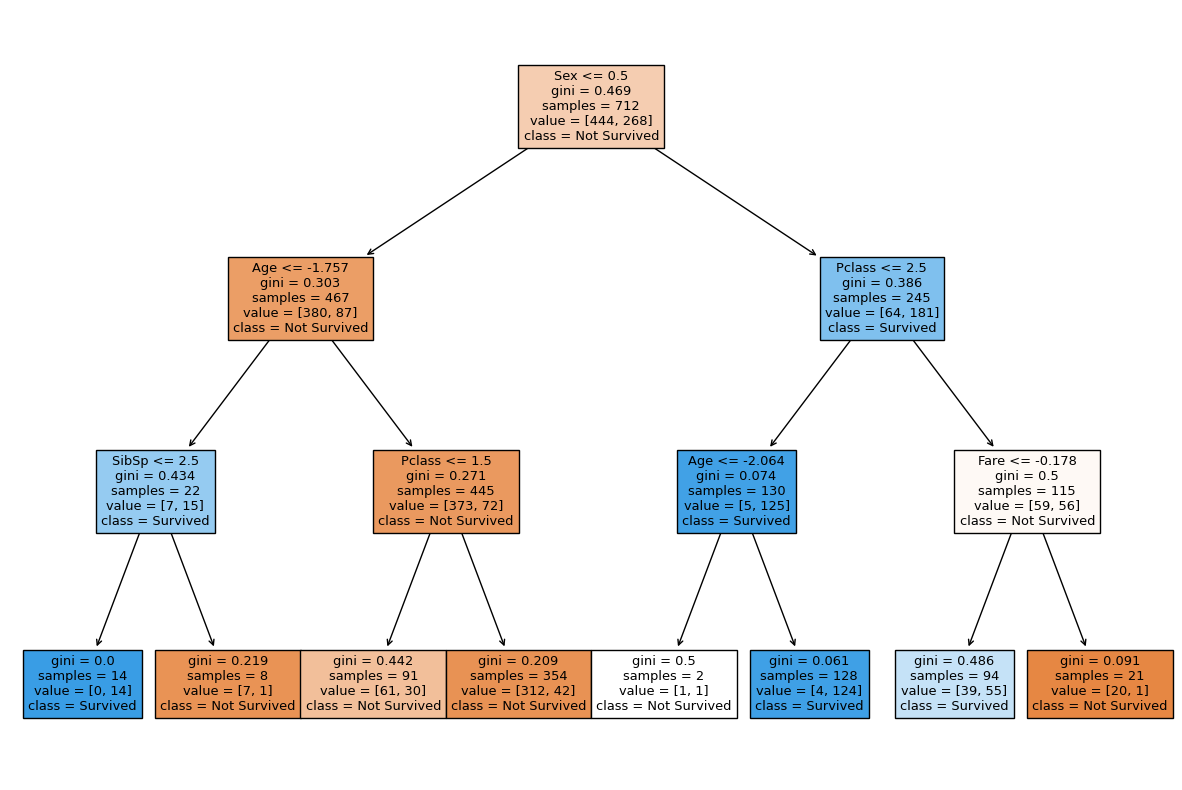

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


**Análisis:** El gráfico muestra un árbol de decisión utilizado para clasificar a los pasajeros del Titanic como sobrevivieron o no sobrevivieron. Cada nodo del árbol representa un punto de decisión y cada rama de un nodo representa un posible valor para la variable de decisión. Las hojas del árbol representan la clasificación final para cada posible combinación de valores de las variables de decisión.

El primer punto de decisión en el árbol es el género. Los pasajeros con un valor de <= 0,5 para el género se clasifican como No sobrevivientes, mientras que los pasajeros con un valor de > 0,5 para el género se envían al siguiente punto de decisión: Edad.

Donde, en general, el árbol de decisión refleja la correcta funcionalidad del modelo y que características como el género (sexo), la edad, la clase social, el número de hermanos y hermanas a bordo y la tarifa del billete fueron todos factores importantes que influyeron en la supervivencia de los pasajeros del Titanic 

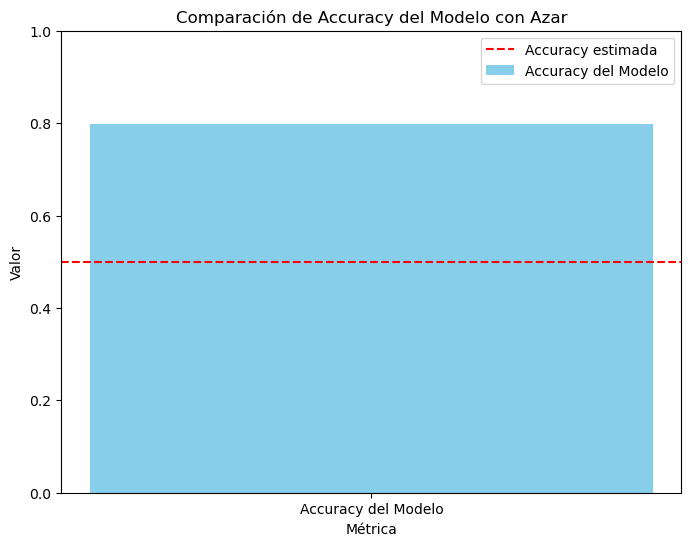

In [34]:
import numpy as np

# Calcular el accuracy esperado al azar (para un problema de clasificación binaria)
random_accuracy = 0.5

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))

# Agregar barras para el accuracy del modelo y el accuracy esperado al azar
plt.bar(['Accuracy del Modelo'], [accuracy], color='skyblue', label='Accuracy del Modelo')
plt.axhline(y=random_accuracy, color='red', linestyle='--', label='Accuracy estimada')

plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1 para el accuracy
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de Accuracy del Modelo con Azar')
plt.legend()
plt.show()


**Análisis:** La precisión del modelo es más alta que la precisión estimada en todo el rango de la métrica. Esto sugiere que el modelo está funcionando bien en la tarea para la que fue diseñado.

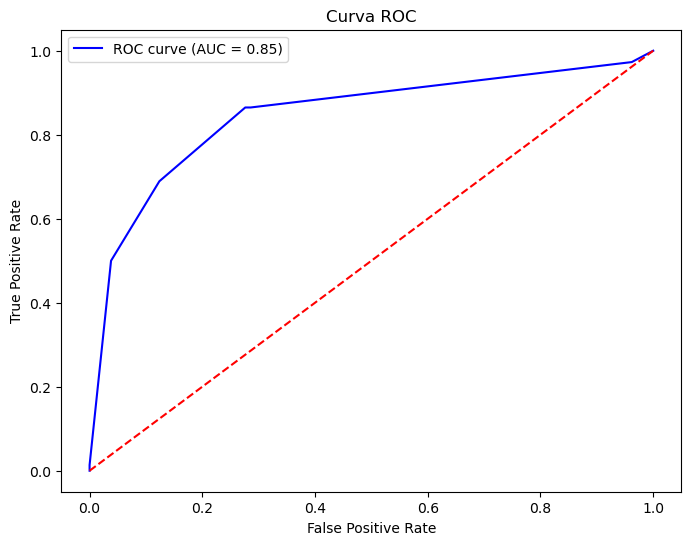

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva (1)
probas_pred = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probas_pred)

# Calcular el área bajo la curva (AUC)
auc = roc_auc_score(y_test, probas_pred)

# Crear el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


**Análisis:** 

- Eje X: Representa la tasa de falsos positivos (FPR). La FPR es la proporción de casos negativos que el modelo clasifica erróneamente como positivos.
- Eje Y: Representa la tasa de verdaderos positivos (TPR). La TPR es la proporción de casos positivos que el modelo clasifica correctamente como positivos.

En el gráfico, la curva ROC se encuentra por encima de la línea diagonal diagonal, lo que indica que el modelo está mejor que la clasificación aleatoria. El AUC del modelo es de 0.85, lo que indica un buen rendimiento y que el modelo es capaz de distinguir correctamente entre los casos positivos y negativos en la mayoría de los casos.


**Conclusión:** El modelo de árbol de decisión exhibe un rendimiento aceptable en la predicción de la supervivencia de los pasajeros del Titanic, con una precisión del 79.89%.